In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [ ]:
train_data=pd.read_csv('Train.csv')
df=train_data.copy()
df.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [ ]:
df.columns

Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time', 'popularity'],
      dtype='object')

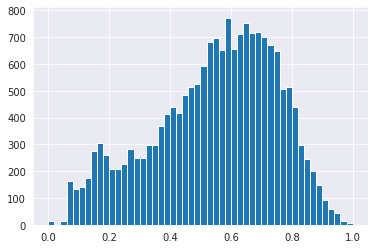

In [ ]:
df['Store_Ratio'].hist(bins=50)

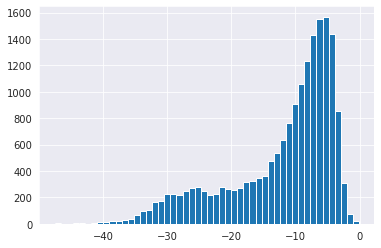

In [ ]:
df['Store_Score'].hist(bins=50)

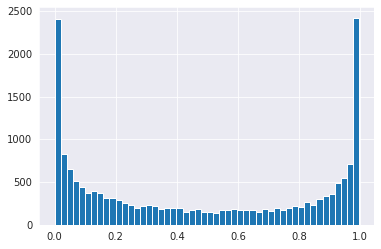

In [ ]:
df['Store_Presence'].hist(bins=50)

In [ ]:
y = df[['popularity']]
df = df.drop(["popularity"],1)

In [ ]:
X = df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(X,1)
X

array([[0.40781563, 0.00358477, 0.18181818, ..., 0.11011011, 0.51848194,
        0.04057165],
       [0.23446894, 0.10480664, 0.        , ..., 0.03823824, 0.34743583,
        0.03989787],
       [0.66933868, 0.7259408 , 0.81818182, ..., 0.45345345, 0.56474481,
        0.03619104],
       ...,
       [0.16833667, 0.00886592, 0.45454545, ..., 0.3963964 , 0.31303908,
        0.03628313],
       [0.5991984 , 0.65792611, 0.09090909, ..., 0.47347347, 0.48614708,
        0.03113896],
       [0.58316633, 0.32385395, 0.18181818, ..., 0.24924925, 0.40398086,
        0.0529969 ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

pred = lr.predict(X_test)
pred1 = lr.predict(X_train)

In [ ]:
from sklearn import metrics

In [ ]:
print ("Accuracy of test set",metrics.accuracy_score(y_test, pred)*100,"%")
print ("Accuracy of training set",metrics.accuracy_score(y_train, pred1)*100,"%")

Accuracy of test set 83.86388583973655 %
Accuracy of training set 83.61565589408568 %


In [ ]:
y.value_counts()

popularity
4             15231
3              2166
5               472
1               323
0                16
dtype: int64

In [ ]:
# class_weight=dict({4:0.60,0:0.90,3:0.85,5:0.9,1:0.9})

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

In [ ]:
# params={
#  "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
# }

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# import xgboost

In [ ]:
# def timer(start_time=None):
#     if not start_time:
#         start_time = datetime.now()
#         return start_time
#     elif start_time:
#         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
#         tmin, tsec = divmod(temp_sec, 60)
#         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
# classifier=xgboost.XGBClassifier()

In [ ]:
# random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='acc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
parameters = {
    "n_estimators":[5,10,50,100,250,500,1000,2000],
    "max_depth":[2,4,8,16,32,None]
    
}

In [ ]:
rfc = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1500, max_features = 'log2',class_weight=class_weight,verbose = 1,n_jobs = -1)

In [ ]:
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   46.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:    0.7s finished


In [ ]:
preds = clf.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.2s finished


In [ ]:
print ("Accuracy of test set",metrics.accuracy_score(y_test, preds)*100,"%")

Accuracy of test set 89.13282107574094 %


In [ ]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.73      0.84        11
           3       0.86      0.32      0.47       115
           4       0.89      0.99      0.94       761
           5       1.00      0.36      0.53        22

    accuracy                           0.89       911
   macro avg       0.95      0.68      0.76       911
weighted avg       0.89      0.89      0.87       911



In [ ]:
pred_log = clf.predict_proba(X_test)
print ("log loss of test set",metrics.log_loss(y_test, pred_log))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:    0.7s finished


log loss of test set 0.3404426034593637


In [ ]:
df = pd.read_csv("Test.csv")

In [ ]:
X = df

In [ ]:
X = scaler.transform(X)
X

array([[1.64328657e-01, 9.93998704e-01, 9.09090909e-02, ...,
        1.00100100e-05, 5.80798449e-01, 5.27758309e-02],
       [5.87174349e-01, 6.35921359e-01, 3.63636364e-01, ...,
        3.55355355e-01, 6.20557030e-01, 5.72113925e-02],
       [4.57915832e-01, 7.42944476e-01, 0.00000000e+00, ...,
        6.88688689e-01, 7.05058238e-01, 4.74188488e-02],
       ...,
       [5.73146293e-01, 8.51968025e-01, 5.45454545e-01, ...,
        3.78378378e-01, 5.91572182e-01, 4.76102525e-02],
       [7.62525050e-01, 5.24897378e-01, 1.00000000e+00, ...,
        5.31531532e-01, 3.68091178e-01, 5.33869298e-02],
       [3.41683367e-01, 1.96826515e-01, 8.18181818e-01, ...,
        9.65965966e-01, 5.23925699e-01, 1.06164566e-02]])

In [ ]:
pred_log = clf.predict_proba(X)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:    2.7s finished


In [ ]:
pred=np.clip(pred_log,0.025,0.975)

In [ ]:
prediction  = pd.DataFrame(pred,columns =['0','1','3','4','5'])
prediction

,0,1,3,4,5
0,0.025,0.092,0.302000,0.503333,0.102667
1,0.025,0.025,0.025000,0.970667,0.025000
2,0.025,0.025,0.029333,0.957333,0.025000
3,0.025,0.025,0.039333,0.944667,0.025000
4,0.025,0.025,0.025000,0.975000,0.025000
...,...,...,...,...,...
12135,0.025,0.025,0.098000,0.872667,0.025000
12136,0.025,0.025,0.025000,0.975000,0.025000
12137,0.025,0.025,0.025000,0.975000,0.025000
12138,0.025,0.025,0.025000,0.975000,0.025000


In [ ]:
prediction.to_csv('result_MP3.csv',index=False)